https://pypi.org/project/censusgeocode/

In [50]:
import censusgeocode as cg

In [2]:
import numpy as np
import pandas as pd
census_number = np.load('census tract numbers.npy',allow_pickle=True)

In [2]:
import geopandas
import numpy as np
import pandas as pd

polygons = geopandas.read_file("/Users/annieouyang/Downloads/cb_2018_06_tract_500k 2")
polygons

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,009,000300,1400000US06009000300,06009000300,3,CT,457009794,394122,"POLYGON ((-120.76399 38.21389, -120.76197 38.2..."
1,06,011,000300,1400000US06011000300,06011000300,3,CT,952744514,195376,"POLYGON ((-122.50006 39.12232, -122.50022 39.1..."
2,06,013,303102,1400000US06013303102,06013303102,3031.02,CT,6507019,0,"POLYGON ((-121.72937 37.96884, -121.71409 37.9..."
3,06,013,303202,1400000US06013303202,06013303202,3032.02,CT,3725528,0,"POLYGON ((-121.72346 37.96161, -121.71672 37.9..."
4,06,013,303203,1400000US06013303203,06013303203,3032.03,CT,6354210,0,"POLYGON ((-121.74486 37.95681, -121.74425 37.9..."
...,...,...,...,...,...,...,...,...,...,...
8036,06,075,022902,1400000US06075022902,06075022902,229.02,CT,161833,0,"POLYGON ((-122.41205 37.75423, -122.40925 37.7..."
8037,06,065,044804,1400000US06065044804,06065044804,448.04,CT,2374766,248057,"POLYGON ((-116.51068 33.80502, -116.51069 33.8..."
8038,06,099,003300,1400000US06099003300,06099003300,33,CT,640784444,2596432,"POLYGON ((-121.48677 37.47565, -121.48341 37.4..."
8039,06,037,124400,1400000US06037124400,06037124400,1244,CT,961439,14163,"POLYGON ((-118.41379 34.17940, -118.41160 34.1..."


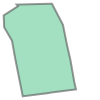

In [3]:
sf = polygons[polygons.COUNTYFP == '075']


In [14]:
sf['name'] = sf['NAME'].astype(str)+'a'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
sf

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,name
526,06,075,010200,1400000US06075010200,06075010200,102,CT,515958,295388,"POLYGON ((-122.42667 37.80964, -122.42488 37.8...",102a
527,06,075,011200,1400000US06075011200,06075011200,112,CT,177414,0,"POLYGON ((-122.41629 37.79389, -122.41522 37.7...",112a
528,06,075,012401,1400000US06075012401,06075012401,124.01,CT,91972,0,"POLYGON ((-122.41771 37.78424, -122.41607 37.7...",124.01a
529,06,075,013300,1400000US06075013300,06075013300,133,CT,581310,0,"POLYGON ((-122.45948 37.78971, -122.45274 37.7...",133a
530,06,075,015400,1400000US06075015400,06075015400,154,CT,719491,0,"POLYGON ((-122.45918 37.78568, -122.45505 37.7...",154a
...,...,...,...,...,...,...,...,...,...,...,...
7789,06,075,035201,1400000US06075035201,06075035201,352.01,CT,939755,630051,"POLYGON ((-122.51207 37.76366, -122.50987 37.7...",352.01a
7790,06,075,060400,1400000US06075060400,06075060400,604,CT,4397436,2420402,"POLYGON ((-122.50680 37.73556, -122.50526 37.7...",604a
7800,06,075,980200,1400000US06075980200,06075980200,9802,CT,1022573,779038,"POLYGON ((-122.51078 37.78206, -122.50748 37.7...",9802a
8026,06,075,025100,1400000US06075025100,06075025100,251,CT,556958,0,"POLYGON ((-122.41066 37.74242, -122.40938 37.7...",251a


In [40]:
med_2018 = pd.read_csv('./median income/2018_med_income.csv')
med_2018 = med_2018.set_index(med_2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
sf_median_incomes = sf.merge(med_2018.iloc[:,2],left_on='NAME',right_index=True)
sf_median_incomes.to_csv('sf median income per census tract.csv')

In [16]:
sf.to_csv('sf polygons.csv')

In [7]:
x, y = sf.geometry.iloc[0].exterior.coords.xy
x,y

(array('d', [-122.426671, -122.424876, -122.42504116215702, -122.42061231511501, -122.419224, -122.418718, -122.41828100000001, -122.417799, -122.417587, -122.420769, -122.420883, -122.424275, -122.424464, -122.424835, -122.425209, -122.425628, -122.426613, -122.426671]),
 array('d', [37.809639, 37.810798999999996, 37.811001508766, 37.811112170060404, 37.808453, 37.805932, 37.804023, 37.801266999999996, 37.800340999999996, 37.799938999999995, 37.799901999999996, 37.799472, 37.800402, 37.802268, 37.804133, 37.806456, 37.808152, 37.809639]))

### Mapping neighborhoods to census tracts

In [49]:
# mapping neighb
neigh = pd.read_csv('/Users/annieouyang/Downloads/Analysis_Neighborhoods.csv')
neigh['TRACTCE']=['0'+x if len(x)==5 else x for x in neigh['TRACTCE10'].astype(str)]
sf_neighborhoods = sf.merge(neigh[['NHOOD','TRACTCE']].astype(str),left_on ='TRACTCE',right_on='TRACTCE')

In [44]:
sf_neighborhoods.to_csv('sf_neighborhoods')